> # **Linear Regression**
> - Multiple Linear Regression is an extension of Simple Linear Regression that allows us to model the relationship between multiple independent variables (features) and a single dependent variable (target). 
> - It assumes a linear relationship between the dependent variable Y and multiple independent variables X1, X2, X3...
<br><br>
> - The multiple linear regression equation is `Y = β0 + β1X1 + β2X2 + … + βnXn`

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

> # **sklearn class - LinearRegression**
> `Hyperparameters`
> - fit_intercept : If set to False, no intercept will be used in calculations
> - n_jobs : no. of CPU cores
> - copy_X : If True, X will be copied; else, it may be overwritten.
> - positive : When set to True, forces the coefficients to be positive. This option 
is only supported for dense arrays.

In [2]:
dataset = load_diabetes(as_frame = True)
df = dataset['data']
df['target'] = dataset['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [54]:
df.corr()['target']

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3       -0.394789
s4        0.430453
s5        0.565883
s6        0.382483
target    1.000000
Name: target, dtype: float64

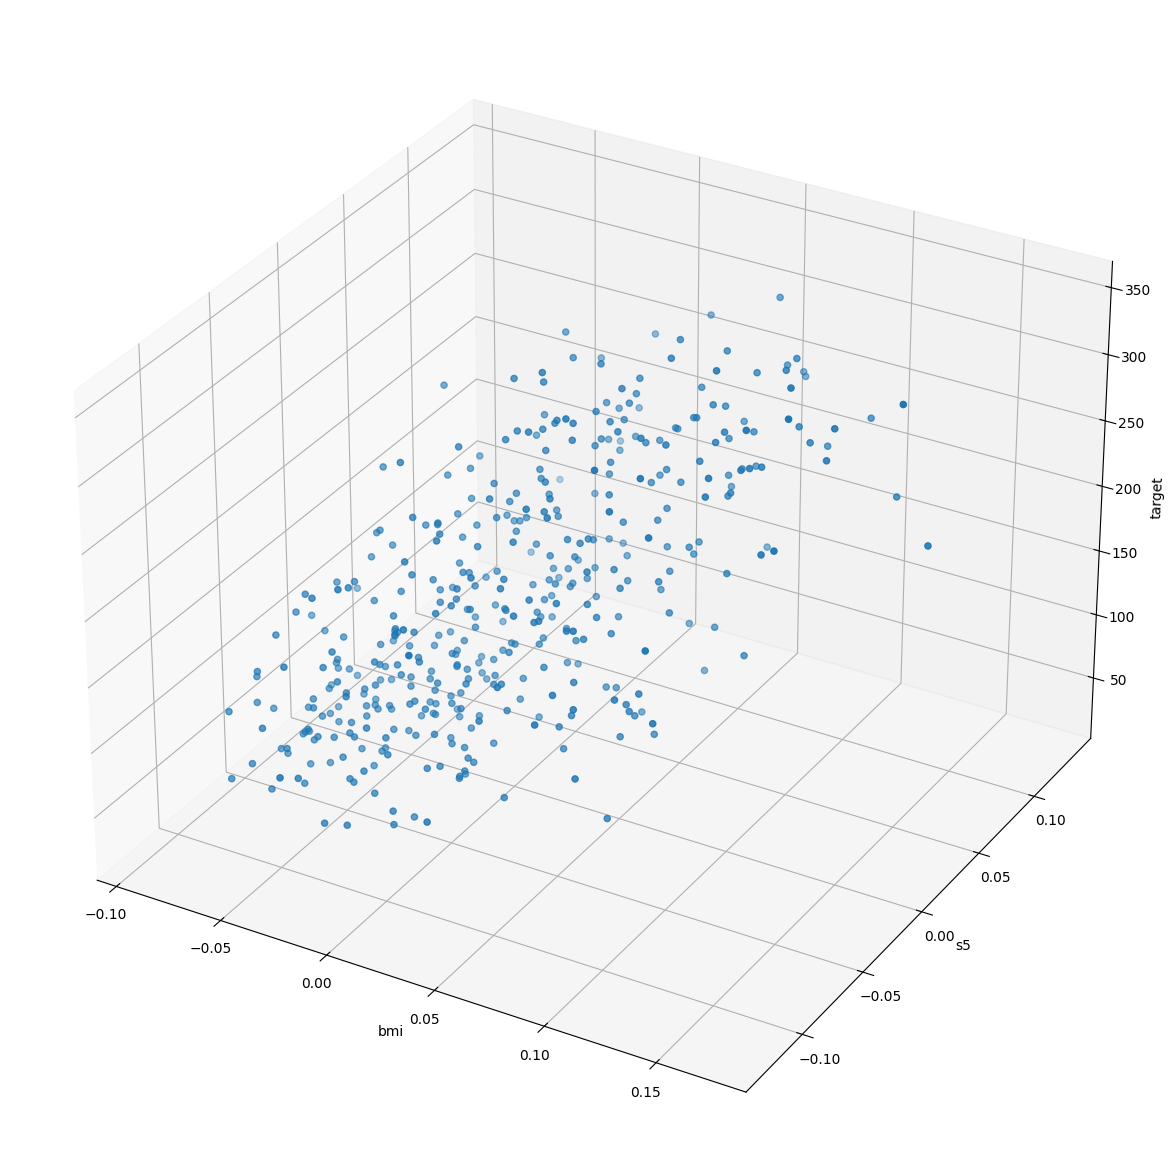

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

fig.set_size_inches(15, 15)

ax.scatter(df['bmi'], df['s5'], df['target'])
ax.set_xlabel('bmi')
ax.set_ylabel('s5')
ax.set_zlabel('target')

plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ['bmi', 's5']], df.iloc[:, -1], test_size = 0.2, random_state =42)

In [4]:
mlr = LinearRegression(fit_intercept = True, n_jobs = -1, positive = False, copy_X = True)
mlr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [5]:
print(mlr.coef_, mlr.intercept_, sep = '\n')

[732.10902123 562.22653533]
151.78215201657332


In [6]:
y_pred = mlr.predict(X_test)
r2_score(y_test, y_pred)

0.4522925957397932

In [7]:
mlr.feature_names_in_

array(['bmi', 's5'], dtype=object)

In [8]:
mlr.n_features_in_

2

In [9]:
mlr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [11]:
mlr.score(X_test, y_test) # There is no training here direct prediction and calculation of R2-score

0.4522925957397932

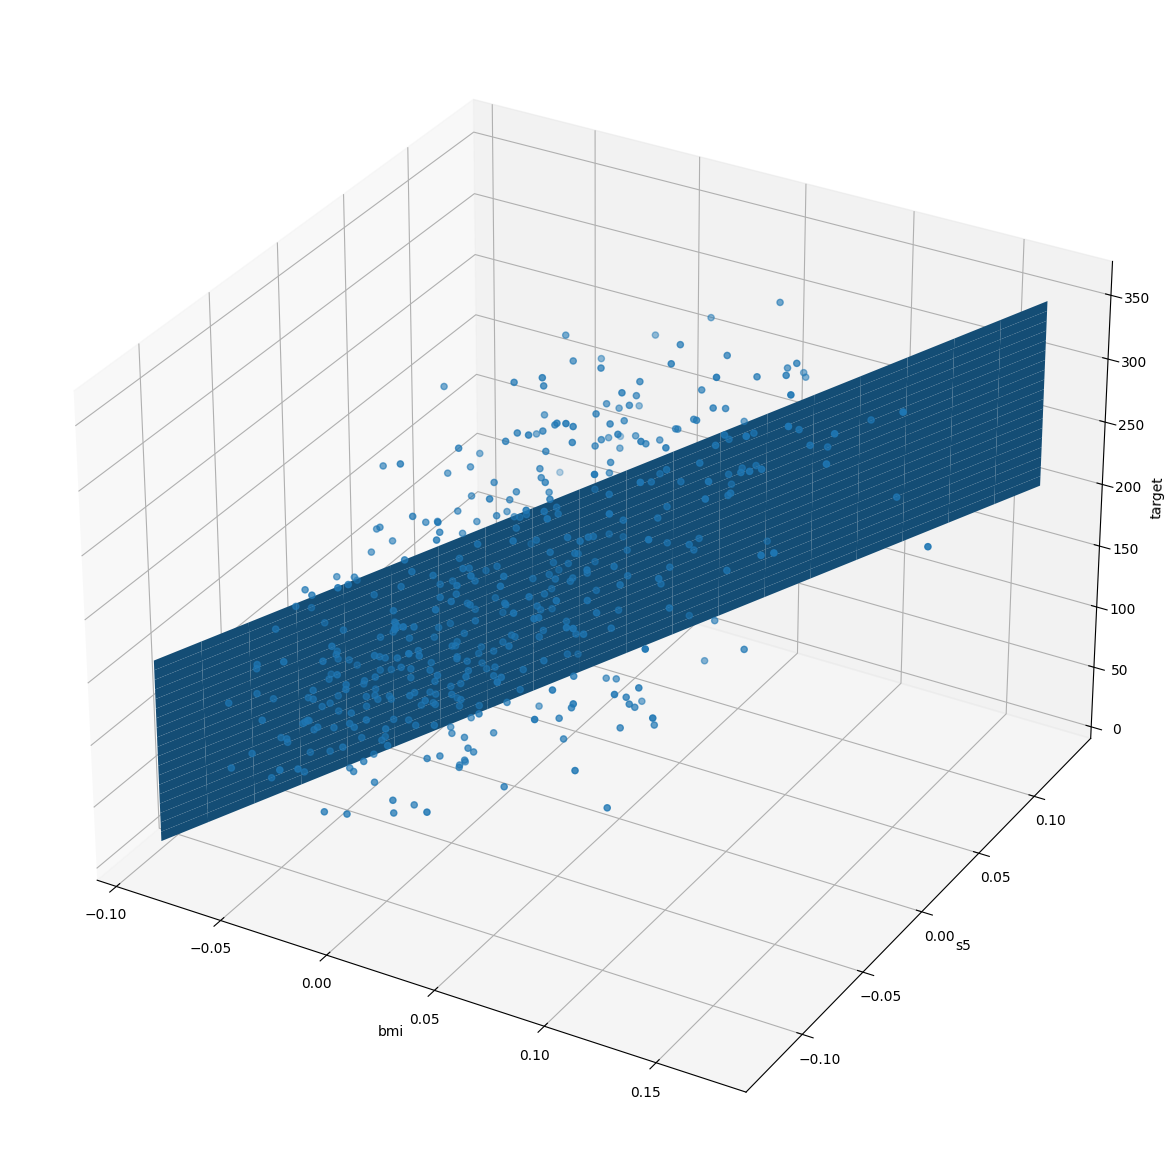

In [60]:
x, y = df['bmi'], df['s5']

x_input = np.linspace(x.min(), x.max(), 20)
y_input = np.linspace(y.min(), y.max(), 20)
xGrid, yGrid = np.meshgrid(x_input,y_input)

grid_df = pd.DataFrame(np.append(xGrid.ravel().reshape(1, 400), yGrid.ravel().reshape(1, 400)).reshape(2, 400).T, columns=['bmi', 's5'])

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
fig.set_size_inches(15, 15)

ax.plot_surface(x_input, y_input, mlr.predict(grid_df).reshape(20, 20))
ax.scatter(df['bmi'], df['s5'], df['target'])
ax.set_xlabel('bmi')
ax.set_ylabel('s5')
ax.set_zlabel('target')

plt.show()

<hr>

> # **Creating Multiple Regression Class**

In [61]:
class LinearRegression:
    def __init__(self) -> None:
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train) -> None:
        # Converting to arrays
        X_train = np.array(X_train)
        y_train = np.array(y_train)

        # Inserting 1 to initial of x
        X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

        # Matrix Multiplication
        weights = np.linalg.inv(X_train.T @ X_train).dot(X_train.T).dot(y_train)

        # coef_ and intercept_
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]
    
    def predict(self, X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [62]:
my_mlr = LinearRegression()
my_mlr.fit(X_train, y_train)

In [63]:
print("sklearn class :", mlr.coef_, mlr.intercept_)
print("My class :", my_mlr.coef_, my_mlr.intercept_)

sklearn class : [732.10902123 562.22653533] 151.78215201657332
My class : [732.10902123 562.22653533] 153.73654390934837


In [64]:
y_pred = my_mlr.predict(X_test)
r2_score(y_test, y_pred)

0.4528589194451449

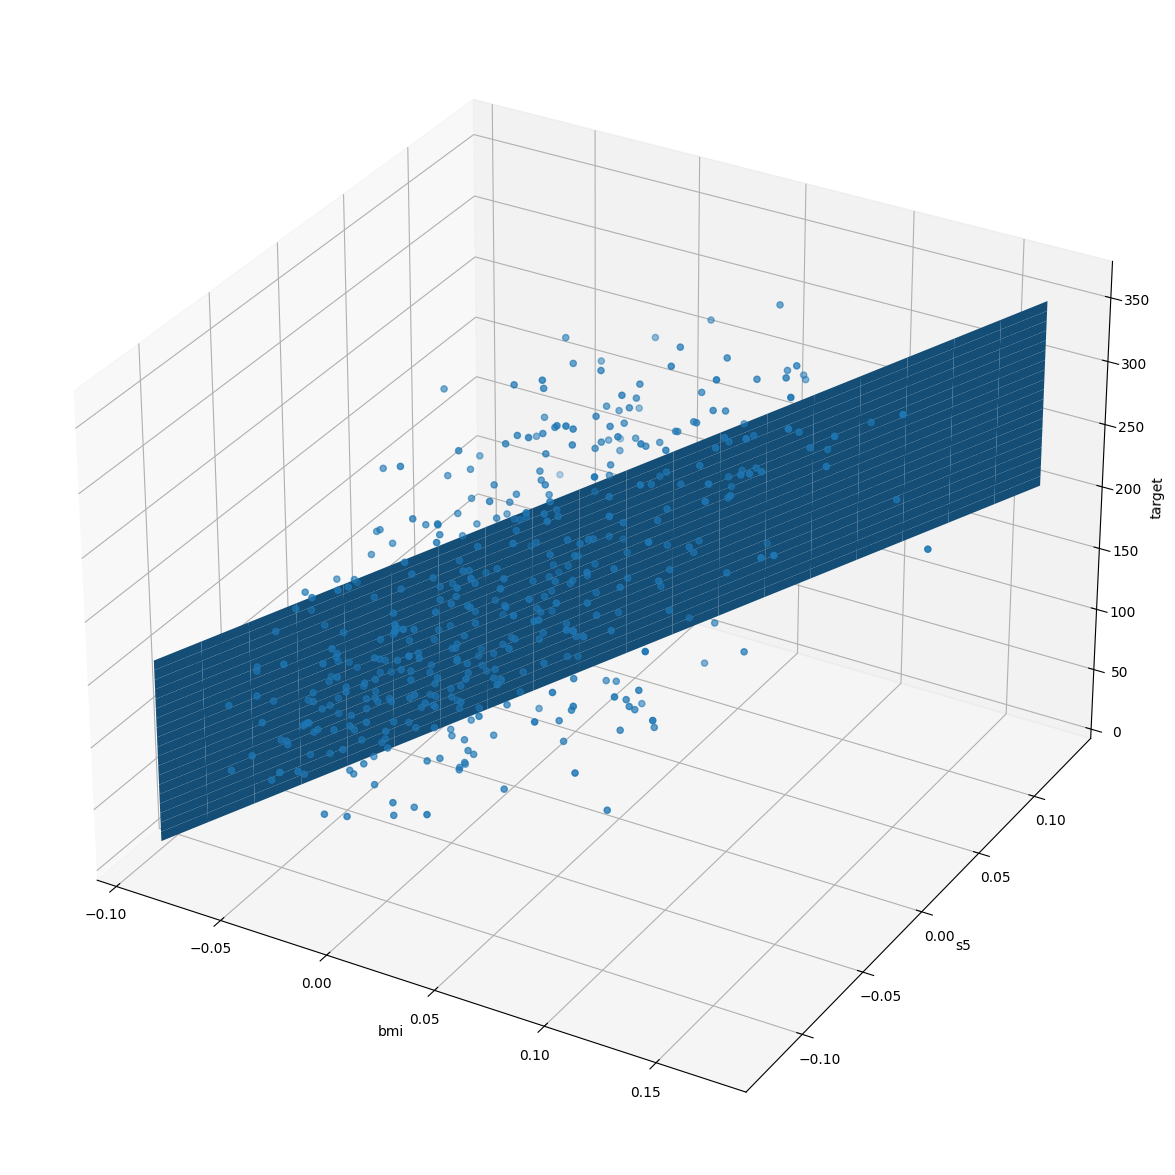

In [71]:
x, y = df['bmi'], df['s5']

x_input = np.linspace(x.min(), x.max(), 20)
y_input = np.linspace(y.min(), y.max(), 20)
xGrid, yGrid = np.meshgrid(x_input,y_input)

grid_df = pd.DataFrame(np.append(xGrid.ravel().reshape(1, 400), yGrid.ravel().reshape(1, 400)).reshape(2, 400).T, columns=['bmi', 's5'])

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
fig.set_size_inches(15, 15)

ax.plot_surface(x_input, y_input, my_mlr.predict(grid_df).reshape(20, 20))
ax.scatter(df['bmi'], df['s5'], df['target'])
ax.set_xlabel('bmi')
ax.set_ylabel('s5')
ax.set_zlabel('target')

plt.show()